# Kernel Classifier

The purpose of this tutorial is to make a dataset linearly separable.
The tutorial is divided into two parts:

1.  Feature transformation

2.  Train a Kernel classifier with Tensorflow

In the first part, you will understand the idea behind a kernel
classifier while in the second part, you will see how to train a kernel
classifier with Tensorflow. You will use the adult dataset. The
objective of this dataset is to classify the revenue below and above
50k, knowing the behavior of each household.

## Why do you need Kernel? 

The aim of every classifier is to predict the classes correctly. For
that, the dataset should be separable. Look at the plot below; it is
fairly simple to see that all points above the black line belong to the
first class and the other points to the second class. However, it is
extremely rare to have a dataset that simple. In most case, the data are
not separable. It gives naive classifiers like a logistic regression a
hard time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_lin = np.array([1,2,3,4,5,6,7,8,9,10])
y_lin = np.array([2,2,3,2,2,9,6,8,8,9])
label_lin = np.array([0,0,0,0,0,1,1,1,1,1])

fig = plt.figure()
ax=fig.add_subplot(111)
plt.scatter(x_lin, y_lin, c=label_lin, s=60)
plt.plot([-2.5, 10], [12.5, -2.5], 'k-', lw=2)
ax.set_xlim([-5,15])
ax.set_ylim([-5,15])
plt.show()

<Figure size 640x480 with 1 Axes>

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/18_kernel_income_v4_files/image001.png)

In the figure below, we plot a dataset which is not linearly separable.
If we draw a straight line, most of the points will be not be classified
in the correct class.

One way to tackle this problem is to take the dataset and transform the
data in another feature map. It means, you will use a function to
transform the data in another plan, which should be linearable.

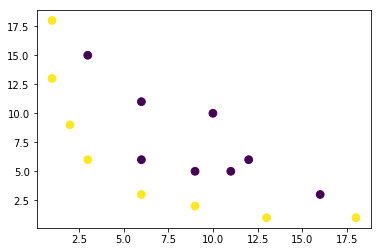

In [2]:
x = np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18])
y = np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1])
label = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])

fig = plt.figure()
plt.scatter(x, y, c=label, s=60)
plt.show()

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/18_kernel_income_v4_files/image002.png)

The data from the figure above is in a two-dimension plan which is not
separable. You can try to transform these data in a three-dimension, it
means, you create a figure with 3 axes.

In our example, we will apply a polynomial mapping to bring our data to
a 3D dimension. The formula to transform the data is as follow.



$$\phi(x,y) = (x^{2},\sqrt{(}2)\text{xy},y^{2})\quad\quad$$

You define a function in Python to create the new feature maps

You can use numpy to code the above formula:

| Formula | Equivalent Numpy Code |
|---------|-----------------------|
| $$x$$     | x[:,0]**              |
| $$y$$    | x[:,1]                |
| $$x^2$$  | x[:,0]**2             |
| $$\sqrt(2)$$ | np.sqrt(2)*           |
| $$xy$$    | x[:,0]*x[:,1]         |
| $$y^2$$ | x[:,1]**2             |

In [3]:
### illustration purpose
def mapping(x, y):
    x = np.c_[(x, y)]
    if len(x) > 2:
        x_1 = x[:,0]**2
        x_2 = np.sqrt(2)*x[:,0]*x[:,1]
        x_3 = x[:,1]**2  
    else:    
        x_1 = x[0]**2
        x_2 = np.sqrt(2)*x[0]*x[1]
        x_3 = x[1]**2
        
    trans_x = np.array([x_1, x_2, x_3])
    return trans_x

The new mapping should be with 3 dimensions with 16 points

In [4]:
x_1  = mapping(x, y)
x_1.shape

(3, 16)

Let's make a new plot with 3 axis, `x`, `y` and `z` respectively.

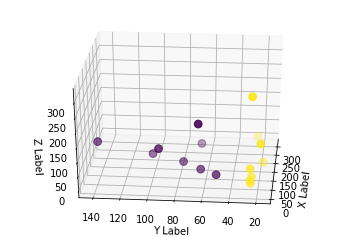

In [5]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[2], c=label, s=60)
ax.view_init(30, 185)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/18_kernel_income_v4_files/image010.png)

We see an improvement but if we change the orientation of the plot, it
is clear that the dataset is now separable

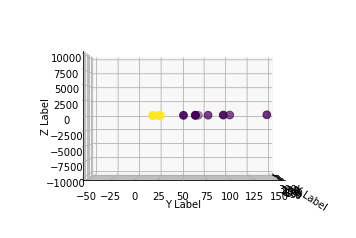

In [6]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1[0], x_1[1], x_1[1], c=label, s=60)
ax.view_init(0, -180)
ax.set_ylim([150,-50])
ax.set_zlim([-10000,10000])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/18_kernel_income_v4_files/image011.png)

To manipulate a large dataset and you may have to create more than 2
dimensions, you will face a big problem using the above method. In fact,
you need to transform all data points, which is clearly not sustainable.
It will take you ages, and your computer may run out of memory.

The most common way to overcome this issue is to use a **kernel**.

## What is a Kernel?

The idea is to use a higher-dimension feature space to make the data
almost linearly separable as shown in the figure above.

There are plenty of higher dimensional spaces to make the data points
separable. For instance, we have shown that the polynomial mapping is a
great start.

We have also demonstrated that with lots of data, these transformation
is not efficient. Instead, you can use a kernel function to modify the
data without changing to a new feature plan.

The magic of the kernel is to find a function that avoids all the
trouble implied by the high-dimensional computation. The result of a
kernel is a scalar, or said differently we are back to one-dimensional
space

After you found this function, you can plug it to the standard linear
classifier.

Let's see an example to understand the concept of Kernel. You have two
vectors, `x1` and `x2`. The objective is to create a higher dimension by
using a polynomial mapping. The output is equal to the dot product of
the new feature map. From the method above, you need to:

1.  Transform `x1` and `x2` into a new dimension

2.  Compute the dot product: common to all kernels

3.  Transform `x1` and `x2` into a new dimension

You can use the function created above to compute the higher dimension.

In [7]:
## Kernel
x1 = np.array([3,6])
x2 = np.array([10,10])

x_1 = mapping(x1, x2)
print(x_1)


[[  9.         100.        ]
 [ 25.45584412 141.42135624]
 [ 36.         100.        ]]


Compute the dot product

You can use the object `dot` from numpy to compute the dot product
between the first and second vector stored in `x_1`.

In [8]:
print(np.dot(x_1[:,0], x_1[:,1]))


8100.0


The output is 8100. You see the problem, you need to store in memory a
new feature map to compute the dot product. If you have a dataset with
millions of records, it is computationally ineffective.

Instead, you can use the **polynomial kernel** to compute the dot
product without transforming the vector. This function computes the dot
product of `x1` and `x2` as if these two vectors have been transformed
into the higher dimension. Said differently, a kernel function computes
the results of the dot product from another feature space.

You can write the polynomial kernel function in Python as follow.

In [9]:
def polynomial_kernel(x, y, p=2):
    return (np.dot(x, y)) ** p

It is the power of the dot product of two vectors. Below, you return the
second degree of the polynomial kernel. The output is equal to the other
method. This is the magic of the kernel.

In [10]:
polynomial_kernel(x1, x2, p=2)


8100

## Type of Kernel

There are lots of different kernels available. The simplest is the
linear kernel. This function works pretty well for text classification.
The other kernel is:

-   Polynomial kernel

-   Gaussian Kernel

[]{#header-n134 .anchor}

In the example with TensorFlow, we will use the Random Fourier.
TensorFlow has a build in estimator to compute the new feature space.
This function is an approximation of the Gaussian kernel function.

$$e\frac{- \parallel x - y\overset{2}{\parallel}}{2\sigma^{2}}$$

This function computes the similarity between the data points in a much
higher dimensional space.

# Train Kernel classifier with TensorFlow

The objective of the algorithm is to classify the household earning more
or less than 50k.

You will evaluate a logistic regression to have a benchmark model. After
that, you will train a Kernel classifier to see if you can get better
results.

You use the following variables from the `adult` dataset:

-   age

-   workclass

-   fnlwgt

-   education

-   education\_num

-   marital

-   occupation

-   relationship

-   race

-   sex

-   capital\_gain

-   capital\_loss

-   hours\_week

-   native\_country

-   label

You will proceed as follow before you train and evaluate the model:

Step 1: Import the libraries

Step 2: Import the data

Step 3: Prepare the data

Step 4: Construct the `input_fn`

Step 5: Construct the logistic model: Baseline model

Step 6: Evaluate the model

Step 7: Construct the Kernel classifier

Step 8: Evaluate the Kernel classifier

**Step 1:** Import the libraries

To import and train the model, you need to import `tensorflow`, `pandas`
and `numpy`

In [11]:
#import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np

/Users/Thomas/anaconda3/envs/hello-tf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


**Step 2:** Import the data

You download the data from the following
[website](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)
and you import it as a panda dataframe.

In [12]:
## Define path data
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_week', 'native_country', 'label']
PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
PATH_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
## Import 

df_train = pd.read_csv(PATH, skipinitialspace=True, names = COLUMNS, index_col=False)
df_test = pd.read_csv(PATH_test,skiprows = 1, skipinitialspace=True, names = COLUMNS, index_col=False)

Now that the train and test set are defined, you can change the column
label from string to integer. tensorflow does not accept string value
for the label.

In [13]:
label = {'<=50K': 0,'>50K': 1}
df_train.label = [label[item] for item in df_train.label]
label_t = {'<=50K.': 0,'>50K.': 1}
df_test.label = [label_t[item] for item in df_test.label]

df_train.shape

(32561, 15)

**Step 3:** Prepare the data

The dataset contains both continuous and categorical features. A good
practice is to standardize the values of the continuous variables. You
can use the function `StandardScaler` from sci-kit learn. You create a
user-defined function as well to make it easier to convert the train and
test set. Note that, you concatenate the continuous and categorical
variables to a common dataset and the array should be of the type:
`float32`

In [14]:
COLUMNS_INT = ['age','fnlwgt','education_num','capital_gain', 'capital_loss', 'hours_week']
CATE_FEATURES = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex', 'native_country']
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def prep_data_str(df):
    
    scaler = StandardScaler()
    le = preprocessing.LabelEncoder()   
    df_toscale = df[COLUMNS_INT]
    df_scaled = scaler.fit_transform(df_toscale.astype(np.float64))
    X_1 = df[CATE_FEATURES].apply(le.fit_transform)
    y = df['label'].astype(np.int32)
    X_conc = np.c_[df_scaled, X_1].astype(np.float32)
    return X_conc, y

The transformer function is ready, you can
convert the dataset and create the `input_fn` function.

In [15]:
X_train, y_train = prep_data_str(df_train)
X_test, y_test = prep_data_str(df_test)
print(X_train.shape)

(32561, 14)


In the next step, you will train a logistic regression. It will give you a baseline accuracy. The objective is to beat the baseline with a different algorithm, namely a Kernel classifier.

**Step 4**: Construct the logistic model: Baseline model

You construct the feature column with the object `real_valued_column`.
It will make sure all variables are dense numeric data.

In [16]:
feat_column = tf.contrib.layers.real_valued_column('features', dimension=14)

The estimator is defined using TensorFlow `Estimator`, you instruct the
feature columns and where to save the graph.

In [17]:
estimator = tf.estimator.LinearClassifier(feature_columns=[feat_column],
                                          n_classes=2,
                                          model_dir = "kernel_log"
                                         )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'kernel_log', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c1d4d8e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


You will train the logisitc regression using mini-batches of size 200.

In [18]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_train},
    y=y_train,
    batch_size=200,
    num_epochs=None,
    shuffle=True)

You can train the model with 1.000 iteration

In [19]:
estimator.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into kernel_log/model.ckpt.
INFO:tensorflow:loss = 138.62949, step = 1
INFO:tensorflow:global_step/sec: 261.643
INFO:tensorflow:loss = 74.75966, step = 101 (0.385 sec)
INFO:tensorflow:global_step/sec: 308.446
INFO:tensorflow:loss = 71.47853, step = 201 (0.326 sec)
INFO:tensorflow:global_step/sec: 333.308
INFO:tensorflow:loss = 83.11995, step = 301 (0.299 sec)
INFO:tensorflow:global_step/sec: 353.282
INFO:tensorflow:loss = 85.21626, step = 401 (0.284 sec)
INFO:tensorflow:global_step/sec: 305.193
INFO:tensorflow:loss = 79.21164, step = 501 (0.327 sec)
INFO:tensorflow:global_step/sec: 330.697
INFO:tensorflow:loss = 85.23293, step = 601 (0.302 sec)
INFO:tensorflow:global_step/sec: 293.68
INFO:tensorflow:loss = 74.686

**Step 6:** Evaluate the model

You define the numpy estimator to evaluate the model. You use the entire
dataset for evaluation

In [20]:
# Evaluation
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"features": X_test},
    y=y_test,
    batch_size=16281,
    num_epochs=1,
    shuffle=False)

estimator.evaluate(input_fn=test_input_fn, steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-04-12:36:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_log/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-09-04-12:36:22
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8247651, accuracy_baseline = 0.76377374, auc = 0.8493674, auc_precision_recall = 0.6747448, average_loss = 0.3867324, global_step = 1000, label/mean = 0.23622628, loss = 6296.39, precision = 0.6719778, prediction/mean = 0.2614143, recall = 0.50442016
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: kernel_log/model.ckpt-1000


{'accuracy': 0.8247651,
 'accuracy_baseline': 0.76377374,
 'auc': 0.8493674,
 'auc_precision_recall': 0.6747448,
 'average_loss': 0.3867324,
 'label/mean': 0.23622628,
 'loss': 6296.39,
 'precision': 0.6719778,
 'prediction/mean': 0.2614143,
 'recall': 0.50442016,
 'global_step': 1000}

You have an accuracy of 82 percents. In the next section, you will try
to beat the logistic classifier with a Kernel classifier

**Step 7:** Construct the Kernel classifier

The kernel estimator is not so different from the traditional linear
classifier, at least in term of construction. The idea behind is to use
the power of explicit kernel with the linear classifier.

You need two pre-defined estimators available in TensorFlow to train the
Kernel Classifier:

-   `RandomFourierFeatureMapper`

-   `KernelLinearClassifier`

You learned in the first section that you need to transform the low
dimension into a high dimension using a kernel function. More precisely,
you will use the Random Fourier, which is an approximation of the
Gaussian function. Luckily, Tensorflow has the function in its library:
`RandomFourierFeatureMapper`. The model can be trained using the
estimator `KernelLinearClassifier`.

To build the model, you will follow these steps:

A.  Set the high dimension Kernel function

B.  Set the L2 hyperparameter

C.  Build the model

D.  Train the model

E.  Evaluate the model

**Step A:** Set the high dimension Kernel function

The current dataset contains 14 features that you will transform to a
new high dimension of the 5.000-dimensional vector. You use the random
Fourier features to achieve the transformation. If you recall the
Gaussian Kernel formula, you note that there is the standard deviation
$\sigma$ parameter to define. This parameter controls for the similarity
measure employs during the classification.

You can tune all the parameters in `RandomFourierFeatureMapper` with:

-   `input_dim = 14`

-   `output_dim= 5000`

-   `stddev=4`

<!-- -->

In [21]:
### Prep Kernel
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(
input_dim=14, output_dim=5000, stddev=4, name='rffm')

You need to construct the kernel mapper by using the feature columns
created before: `feat_column`

In [22]:
### Map Kernel
kernel_mappers = {feat_column: [kernel_mapper]}

**Step B:** Set the L2 hyperparameter

To prevent overfitting, you penalize the loss function with the L2
regularizer. You set the L2 hyperparameter to 0.1 and the learning rate
to 5

In [23]:
optimizer = tf.train.FtrlOptimizer(
learning_rate=5, l2_regularization_strength=0.1)

**Step C:** Build the model

The next step is similar to the linear classification. You use the
build-in estimator `KernelLinearClassifier`. Note that you add the
kernel mapper defined previously and change the model directory.

In [24]:
### Prep estimator
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
n_classes=2,
optimizer=optimizer,
kernel_mappers=kernel_mappers, 
model_dir="kernel_train")

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c1e1c3f98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_

**Step D:** Train the model

Now that the Kernel classifier is built, you are ready to train it. You
choose to iterate 2000 times the model

In [25]:
### estimate 
estimator_kernel.fit(input_fn=train_input_fn, steps=2000)

Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.6931474, step = 1
INFO:tensorflow:global_step/sec: 62.9676
INFO:tensorflow:loss = 0.42536858, step = 101 (1.590 sec)
INFO:tensorflow:global_step/sec: 76.5478
INFO:tensorflow:loss = 0.3803177, step = 201 (1.307 sec)
INFO:tensorflow:global_step/sec: 70.7709
INFO:tensorflow:loss = 0.33762196, step = 301 (1.413 sec)
INFO:tensorflow:global_step/sec: 87.447
INFO:tensorflow:loss = 0.40866998, step = 401 (1.143 sec)
INFO:tensorflow:global_step/sec: 65.3455
INFO:tensorflow:loss = 0.4405681, step = 501 (1.531 sec)
I

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x10f1fe7b8>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x1c1d4ef208>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=14, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x1c1d4ef2e8>]}})

**Step E:** Evaluate the model

Last but not least, you evaluate the performance of your model. You
should be able to beat the logistic regression.

In [26]:
# Evaluate and report metrics.
eval_metrics = estimator_kernel.evaluate(input_fn=test_input_fn, steps=1)

INFO:tensorflow:Starting evaluation at 2018-09-04-12:36:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-09-04-12:36:54
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.8389534, accuracy/baseline_label_mean = 0.23622628, accuracy/threshold_0.500000_mean = 0.8389534, auc = 0.8904966, auc_precision_recall = 0.72741604, global_step = 2000, labels/actual_label_mean = 0.23622628, labels/prediction_mean = 0.22733423, loss = 0.34312406, precision/positive_threshold_0.500000_mean = 0.74717283, recall/positive_threshold_0.500000_mean = 0.48101923


The final accuracy is 84%, it is a 2% improvement compared to the logistic regression. There is a tradeoff between accuracy improvement and computational cost. You need to think if 2% improvement worth the time consumed by the different classifier and if it has a compelling impact on your business. 

## Summary

A kernel is a great tool to transform non-linear data to (almost)
linear. The shortcoming of this method is it computationally
time-consuming and costly.

Below, you can find the most important code to train a kernel classifer

*Set the high dimension Kernel function*

-   `input_dim = 14`

-   `output_dim= 5000`

-   `stddev=4`

Prep Kernel

In [27]:
kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(
input_dim=14, output_dim=5000, stddev=4, name='rffm')

Set the L2 hyperparameter

In [28]:
optimizer = tf.train.FtrlOptimizer(
learning_rate=5, l2_regularization_strength=0.1)

Build the model

In [29]:
estimator_kernel = tf.contrib.kernel_methods.KernelLinearClassifier(
n_classes=2,
optimizer=optimizer,
kernel_mappers=kernel_mappers,
model_dir="kernel_train")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c1df20710>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'kernel_train'}


Train the model

In [30]:
estimator_kernel.fit(input_fn=train_input_fn, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2000 into kernel_train/model.ckpt.
INFO:tensorflow:loss = 0.29066592, step = 2001
INFO:tensorflow:global_step/sec: 81.0098
INFO:tensorflow:loss = 0.3658589, step = 2101 (1.236 sec)
INFO:tensorflow:global_step/sec: 78.2854
INFO:tensorflow:loss = 0.34852684, step = 2201 (1.277 sec)
INFO:tensorflow:global_step/sec: 67.8807
INFO:tensorflow:loss = 0.34097832, step = 2301 (1.474 sec)
INFO:tensorflow:global_step/sec: 67.7932
INFO:tensorflow:loss = 0.4329201, step = 2401 (1.474 sec)
INFO:tensorflow:global_step/sec: 77.801
INFO:tensorflow:loss = 0.32452166, step = 2501 (1.289 sec)
INFO:tensorflow:global_step/sec: 78.6713
INFO:tensorflow:loss = 0.3111766, step = 2601 (1.268 sec)
INFO:tensorflow:global_step/sec: 72.3864
INFO:te

KernelLinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1c1df20b38>, 'feature_columns': {_RealValuedColumn(column_name='features_MAPPED', dimension=5000, default_value=None, dtype=tf.float32, normalizer=None)}, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x10f214278>, 'kernel_mappers': {_RealValuedColumn(column_name='features', dimension=14, default_value=None, dtype=tf.float32, normalizer=None): [<tensorflow.contrib.kernel_methods.python.mappers.random_fourier_features.RandomFourierFeatureMapper object at 0x1c1d4ef2e8>]}})

Evaluate the model

In [31]:
eval_metrics = estimator_kernel.evaluate(input_fn=test_input_fn,
steps=1)

INFO:tensorflow:Starting evaluation at 2018-09-04-12:37:23
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kernel_train/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-09-04-12:37:25
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.84270006, accuracy/baseline_label_mean = 0.23622628, accuracy/threshold_0.500000_mean = 0.84270006, auc = 0.8950697, auc_precision_recall = 0.73921394, global_step = 4000, labels/actual_label_mean = 0.23622628, labels/prediction_mean = 0.22281823, loss = 0.3347098, precision/positive_threshold_0.500000_mean = 0.7528532, recall/positive_threshold_0.500000_mean = 0.4973999
